In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Iris csv 파일 불러오기
path = "/content/Iris.csv"
df = pd.read_csv(path)

In [13]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


KNN 정확도: 1.0


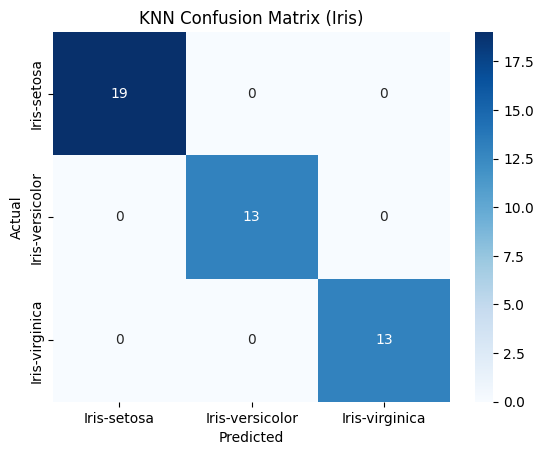

In [14]:
# 필요한 열만 선택 + 결측치 제거
df_cls = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']].dropna()

X_cls = df_cls[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_cls = df_cls['Species']

# 라벨 인코딩 하기
le = LabelEncoder()
y_enc = le.fit_transform(y_cls)

# 학습/테스트 분리 하기
X_train, X_test, y_train, y_test = train_test_split(
    X_cls, y_enc, test_size=0.3, random_state=42
)

# 스케일링 하기
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# KNN 모델 학습 하기
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sc, y_train)

# 예측 하기
y_pred_knn = knn.predict(X_test_sc)
print("KNN 정확도:", accuracy_score(y_test, y_pred_knn))

# 시각화 하기
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("KNN Confusion Matrix (Iris)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Decision Tree 정확도: 1.0


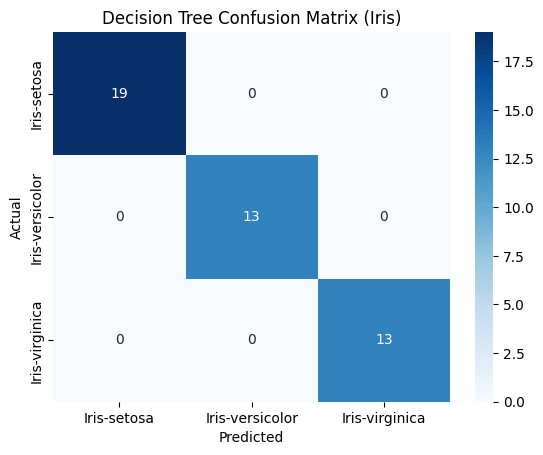

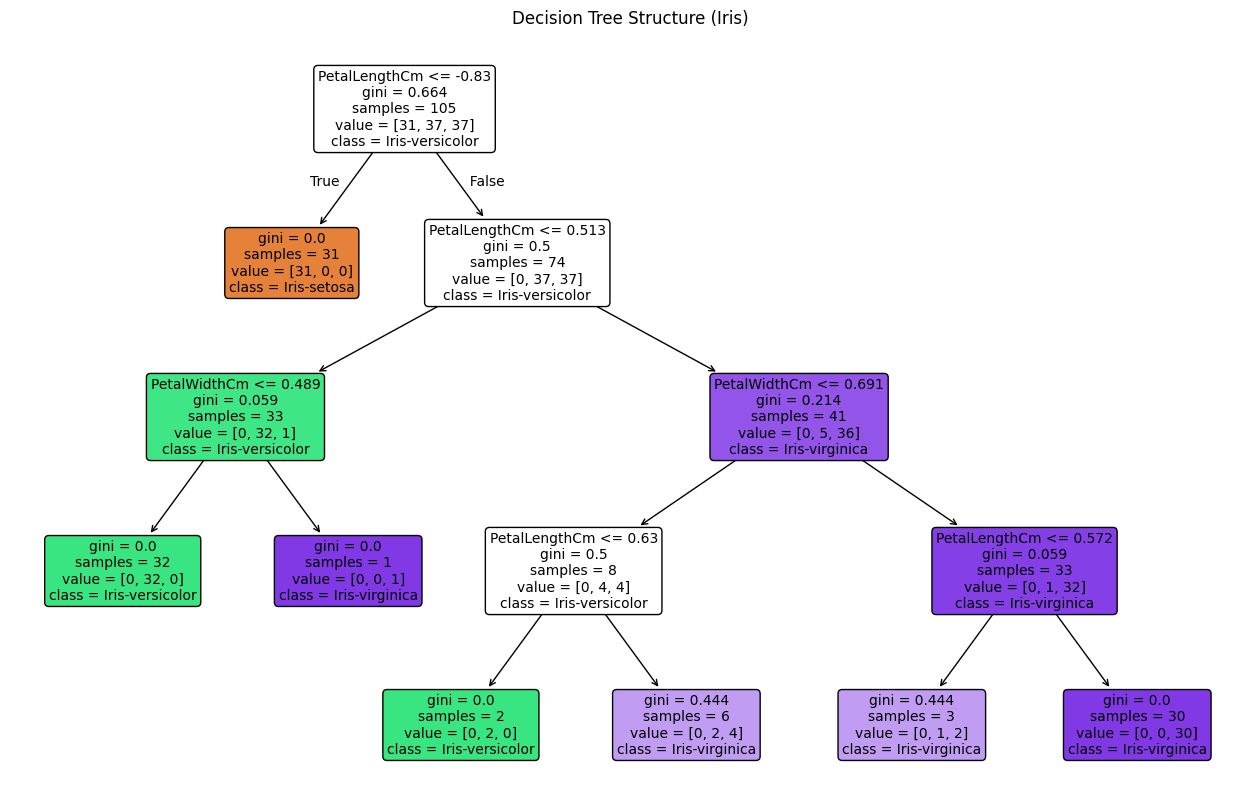

In [15]:
# Decision Tree 모델 학습
dt = DecisionTreeClassifier(random_state=42, max_depth=4)
dt.fit(X_train_sc, y_train)

# 예측 하기
y_pred_dt = dt.predict(X_test_sc)
print("Decision Tree 정확도:", accuracy_score(y_test, y_pred_dt))

# 시각화 하기
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Decision Tree Confusion Matrix (Iris)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 트리 시각화
plt.figure(figsize=(16, 10))
plot_tree(dt,
          feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
          class_names=le.classes_,
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Structure (Iris)")
plt.show()


Logistic Regression 정확도: 1.0


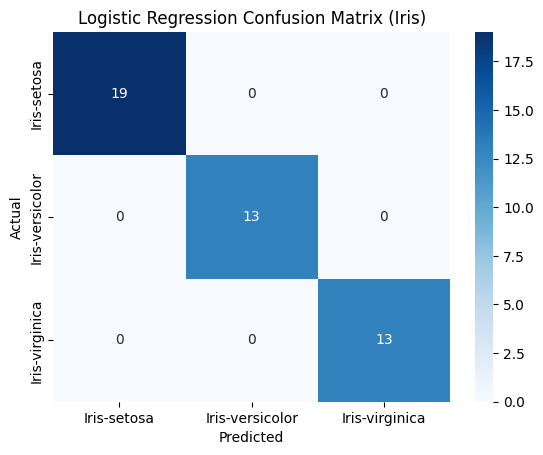

In [16]:
# Logistic Regression 모델 학습 하기
logr = LogisticRegression(max_iter=200, random_state=42)
logr.fit(X_train_sc, y_train)

# 예측 하기
y_pred_logr = logr.predict(X_test_sc)
print("Logistic Regression 정확도:", accuracy_score(y_test, y_pred_logr))

# 시각화 하기
cm_logr = confusion_matrix(y_test, y_pred_logr)
sns.heatmap(cm_logr, annot=True, fmt='d', cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Logistic Regression Confusion Matrix (Iris)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()